# Project Title: Famous Paintings Analysis

# Data analyazed by:- Aarya Sharma

# Problem Statement:

***The art market often lacks a clear understanding of relationships between artists, their artworks, and pricing. 
This project aims to analyze data from various sources to uncover trends in artwork production, pricing by canvas size, and the distribution 
of artworks across museums, facilitating better insights for collectors, curators, and art enthusiasts.***

In [12]:
!pip install mysql-connector-python
!pip install pymysql
!pip3 install pymysql
!pip install matplotlib
!pip install seaborn
!pip install seaborn matplotlib
!pip install pandas
!pip install sqlalchemy
!pip install psycopg2

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Insight*** -
Installed all necessary packages

In [12]:
connection = mysql.connector.connect(
    user='root',
    password='Aaryasharma27&',
    host='localhost',
    port=3306,
    database='famous_paintings1'
)

In [6]:
# Check if the connection is successful
if connection.is_connected():
    print("Connection to the database was successful!")

Connection to the database was successful!


***Insight***-
The code establishes a connection to a locally hosted MySQL database using the mysql.connector.connect method, 
allowing me to perform SQL operations in Python. Ensure to manage sensitive data securely and handle errors appropriately.

# Exploratory Data Analysis

In [13]:
# Create a cursor object
cursor = connection.cursor()

In [9]:

# Check if the connection is successful
if connection.is_connected():
    print("Connection to the database was successful!")
    
    try:
        # Create a cursor object to interact with the database
        cursor = connection.cursor()
        print("Cursor object created successfully!")

        # Optionally, you can execute a simple query to verify that the cursor is working
        cursor.execute("SELECT DATABASE();")
        result = cursor.fetchone()
        print(f"Connected to database: {result[0]}")
        
    except mysql.connector.Error as err:
        print(f"Error creating cursor: {err}")


Connection to the database was successful!
Cursor object created successfully!
Connected to database: famous_paintings1


***Insight:-***
created a cursor to make a connection between SQL and jupyter notebook 

# Function to retrieve data from MySQL and convert to pandas DataFrame

In [14]:
# Helper function to retrieve data from MySQL and convert to pandas DataFrame
def fetch_data(query, cursor):
    cursor.execute(query)
    return pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [3]:
import pandas as pd

# Helper function to retrieve data from MySQL and convert to pandas DataFrame
def fetch_data(query, cursor):
    try:
        # Execute the query
        cursor.execute(query)
        
        # Fetch all results
        results = cursor.fetchall()
        
        # Get column names from cursor.description
        column_names = [desc[0] for desc in cursor.description]
        
        # Convert results to a pandas DataFrame
        df = pd.DataFrame(results, columns=column_names)
        
        return df
    
    except mysql.connector.Error as err:
        print(f"Error fetching data: {err}")
        return None 


***Insights:-*** using a function to retrieve data from MySql and converting it into a dataframe.

# Fetch data from SQL tables


In [6]:
# Fetch data from the 'artist' table
artist_data = fetch_data("SELECT * FROM artist", cursor)
print(artist_data)

# Fetch data from the 'canvas_size' table
canvasize_data = fetch_data("SELECT * FROM canvas_size", cursor)
print (canvasize_data)

# Fetch data from the 'museum' table
museum_data = fetch_data("SELECT * FROM museum", cursor)
print(museum_data)
# Fetch data from the 'museum_house' table
museumhouse_data = fetch_data("SELECT * FROM museum_house", cursor)
print(museumhouse_data)
# Fetch data from the 'work' table
work_data = fetch_data("SELECT * FROM work", cursor)
print(work_data)
# Fetch data from the 'subject' table
subject_data = fetch_data("SELECT * FROM subject", cursor)
print(subject_data )
# Fetch data from the 'product_price' table
product_data = fetch_data("SELECT * FROM product_price", cursor)
print(product_data)

    artist_id                     full_name  first_name middle_names  \
0           1         Pierre-Auguste Renoir      Pierre      Auguste   
1           2         Lemuel Francis Abbott      Lemuel      Francis   
2           3           Eugène-Louis Boudin      Eugene        Louis   
3           4            Asher Brown Durand       Asher        Brown   
4           5          George Henry Laporte      George        Henry   
5           6           John Francis Rigaud        John      Francis   
6           7       John William Waterhouse        John      William   
7           8       Francis William Edmonds     Francis      William   
8           9           Frank Weston Benson      Benson        Frank   
9          10           Gustaf Wilhelm Palm      Gustaf      Wilhelm   
10         11          Edward William Cooke      Edward      William   
11         12         George Wesley Bellows      George       Wesley   
12         13           Alfred Henry Maurer      Alfred        H

***INSIGHTS:-*** Fetching the data from MySQL.

# Data Cleaning


# Missing values :-


In [7]:
# Checking for missing values in artist_data
missing_values = artist_data.isnull().sum()
print("Missing values in artist_data:")
print(missing_values)

# Checking for missing values in canvasize_data
missing_values = canvasize_data.isnull().sum()
print("\nMissing values in canvasize_data:")
print(missing_values)

# Checking for missing values in museum_data
missing_values = museum_data.isnull().sum()
print("\nMissing values in museum_data:")
print(missing_values)

# Checking for missing values in museumhouse_data
missing_values = museumhouse_data.isnull().sum()
print("\nMissing values in museumhouse_data:")
print(missing_values)

# Checking for missing values in work_data
missing_values = work_data.isnull().sum()
print("\nMissing values in work_data:")
print(missing_values)

# Checking for missing values in subject_data
missing_values = subject_data.isnull().sum()
print("\nMissing values in subject_data:")
print(missing_values)

# Checking for missing values in product_data
missing_values = product_data.isnull().sum()
print("\nMissing values in product_data:")
print(missing_values)

Missing values in artist_data:
artist_id       0
full_name       0
first_name      0
middle_names    0
last_name       0
nationality     0
style           0
birth           0
death           0
dtype: int64

Missing values in canvasize_data:
size_id    0
width      0
height     0
label      0
dtype: int64

Missing values in museum_data:
museum_id    0
name         0
address      0
city         0
state        0
postal       0
country      0
phone        0
dtype: int64

Missing values in museumhouse_data:
museum_id    0
day          0
open         0
close        0
dtype: int64

Missing values in work_data:
work_id      0
name         0
artist_id    0
museum_id    0
dtype: int64

Missing values in subject_data:
work_id    0
subject    0
dtype: int64

Missing values in product_data:
work_id          0
size_id          0
sale_price       0
regular_price    0
dtype: int64


***Insights:-*** Checking if there is any missing values in the dataframe.

# Handling duplicate values:-

In [8]:
# Checking for duplicate rows in artist_data
duplicates = artist_data.duplicated().sum()
print("Duplicate rows in artist_data:", duplicates)

# Checking for duplicate rows in canvasize_data
duplicates = canvasize_data.duplicated().sum()
print("\nDuplicate rows in canvasize_data:", duplicates)

# Checking for duplicate rows in museum_data
duplicates = museum_data.duplicated().sum()
print("\nDuplicate rows in museum_data:", duplicates)

# Checking for duplicate rows in museumhouse_data
duplicates = museumhouse_data.duplicated().sum()
print("\nDuplicate rows in museumhouse_data:", duplicates)

# Checking for duplicate rows in work_data
duplicates = work_data.duplicated().sum()
print("\nDuplicate rows in work_data:", duplicates)

# Checking for duplicate rows in subject_data
duplicates = subject_data.duplicated().sum()
print("\nDuplicate rows in subject_data:", duplicates)

# Checking for duplicate rows in product_data
duplicates = product_data.duplicated().sum()
print("\nDuplicate rows in product_data:", duplicates)

Duplicate rows in artist_data: 0

Duplicate rows in canvasize_data: 0

Duplicate rows in museum_data: 0

Duplicate rows in museumhouse_data: 0

Duplicate rows in work_data: 0

Duplicate rows in subject_data: 0

Duplicate rows in product_data: 0


***Insights:-*** checking if there is any duplicate rows in the data set.

# Data View :-

In [9]:
# Displaying information about artist_data
print("Information about artist_data:")
print(artist_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about canvasize_data
print("Information about canvasize_data:")
print(canvasize_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about museum_data
print("Information about museum_data:")
print(museum_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about museumhouse_data
print("Information about museumhouse_data:")
print(museumhouse_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about work_data
print("Information about work_data:")
print(work_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about subject_data
print("Information about subject_data:")
print(subject_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

# Displaying information about product_data
print("Information about product_data:")
print(product_data.info())
print("\n" + "="*50 + "\n")  # Separator for clarity

Information about artist_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_id     50 non-null     int64 
 1   full_name     50 non-null     object
 2   first_name    50 non-null     object
 3   middle_names  50 non-null     object
 4   last_name     50 non-null     object
 5   nationality   50 non-null     object
 6   style         50 non-null     object
 7   birth         50 non-null     int64 
 8   death         50 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 3.6+ KB
None


Information about canvasize_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   size_id  50 non-null     int64 
 1   width    50 non-null     object
 2   height   50 non-null     object
 3   label    50 non-null  

***Insights:-*** using a code to display the information about the data.

In [10]:
# Display the first few rows of the Artist Data
print("Artist Data:")
print(artist_data.head())

# Display the first few rows of the Canvas Size Data
print("\nCanvas Size Data:")
print(canvasize_data.head())

# Display the first few rows of the Museum Data
print("\nMuseum Data:")
print(museum_data.head())

# Display the first few rows of the Museum House Data
print("\nMuseum House Data:")
print(museumhouse_data.head())

# Display the first few rows of the Work Data
print("\nWork Data:")
print(work_data.head())

# Display the first few rows of the Subject Data
print("\nSubject Data:")
print(subject_data.head())

# Display the first few rows of the Product Data
print("\nProduct Data:")
print(product_data.head())

Artist Data:
   artist_id              full_name first_name middle_names last_name  \
0          1  Pierre-Auguste Renoir     Pierre      Auguste    Renoir   
1          2  Lemuel Francis Abbott     Lemuel      Francis    Abbott   
2          3    Eugène-Louis Boudin     Eugene        Louis    Boudin   
3          4     Asher Brown Durand      Asher        Brown    Durand   
4          5   George Henry Laporte     George        Henry   Laporte   

  nationality                style  birth  death  
0      French        Impressionist   1841   1919  
1     English          Portraitist   1760   1803  
2      French        Impressionist   1824   1898  
3    American  Hudson River School   1796   1886  
4     English              Realist   1799   1873  

Canvas Size Data:
   size_id  width height                      label
0        1  15.00  22.00  15" x 22" (38 cm x 56 cm)
1        2  16.00  18.00  16" x 18" (41 cm x 46 cm)
2        3  16.00  20.00  16" x 20" (41 cm x 51 cm)
3        4  16.

***Insights:-***  Displaying the first few rows of the datasets.

# Data Visualization


# Chart 1:-

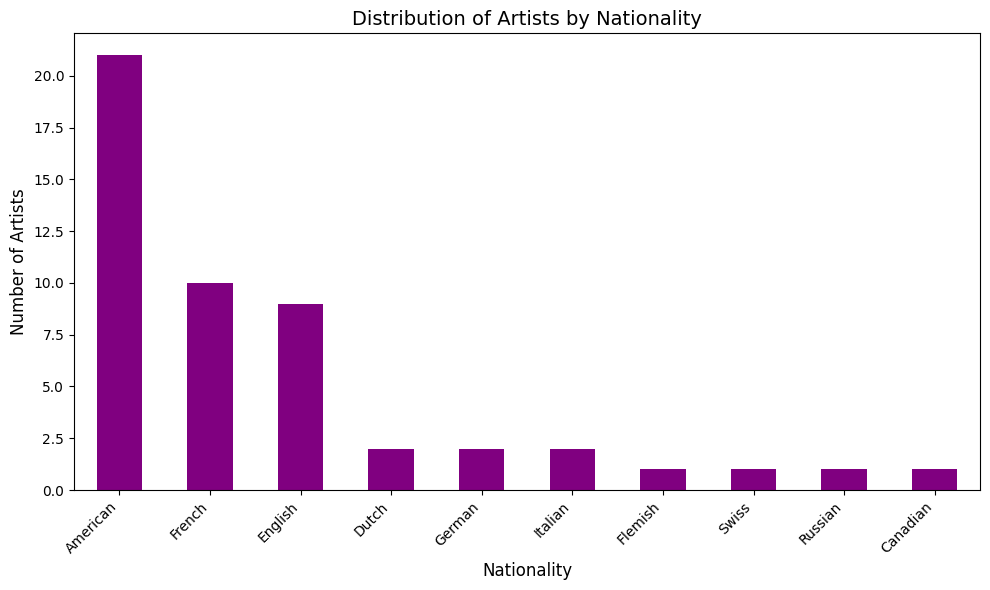

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector


connection = mysql.connector.connect(
    user='root',
    password='Aaryasharma27&',
    host='localhost',
    port=3306,
    database='famous_paintings1'
)

# Check if the lengths match
if len(data['full_name']) != len(data['nationality']):
    print("Error: The lists do not have the same length!")
else:
    # Create the DataFrame
    df = pd.DataFrame(data)

    # Count occurrences of each nationality
    nationality_count = df['nationality'].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10,6))
    nationality_count.plot(kind='bar', color='purple')
    plt.title('Distribution of Artists by Nationality', fontsize=14)
    plt.xlabel('Nationality', fontsize=12)
    plt.ylabel('Number of Artists', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()


# Chart 2:-

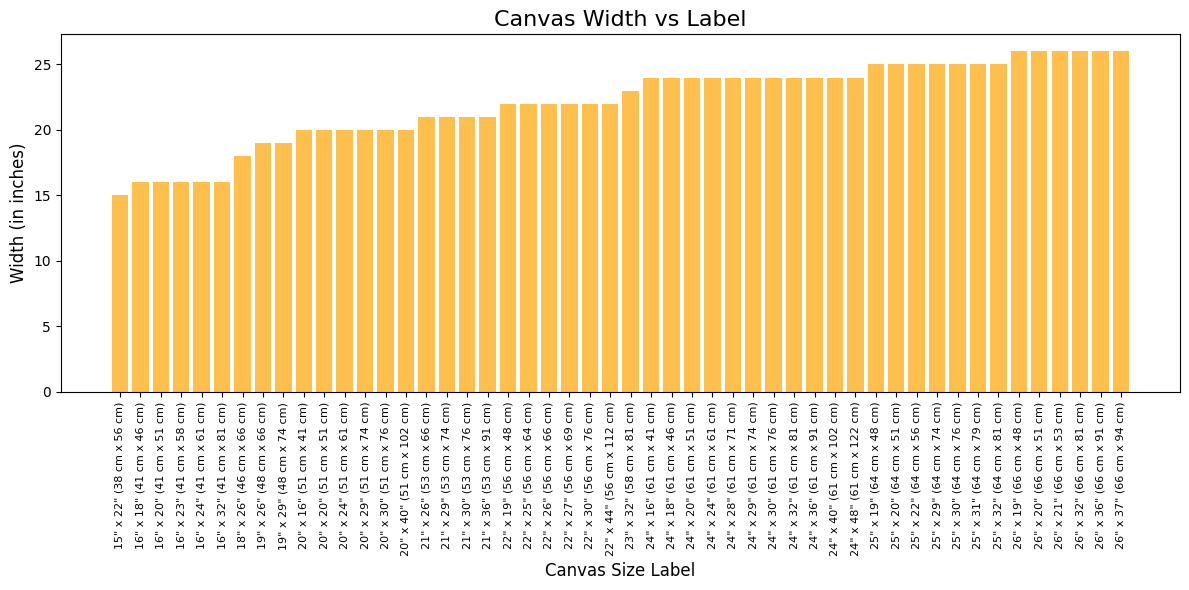

In [45]:
# Bar plot for Width vs Label
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(df['label'], df['width'], color='orange', alpha=0.7)

# Rotate labels for better visibility
plt.xticks(rotation=90, fontsize=8)

# Title and labels
plt.title('Canvas Width vs Label', fontsize=16)
plt.xlabel('Canvas Size Label', fontsize=12)
plt.ylabel('Width (in inches)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Chart:- 3

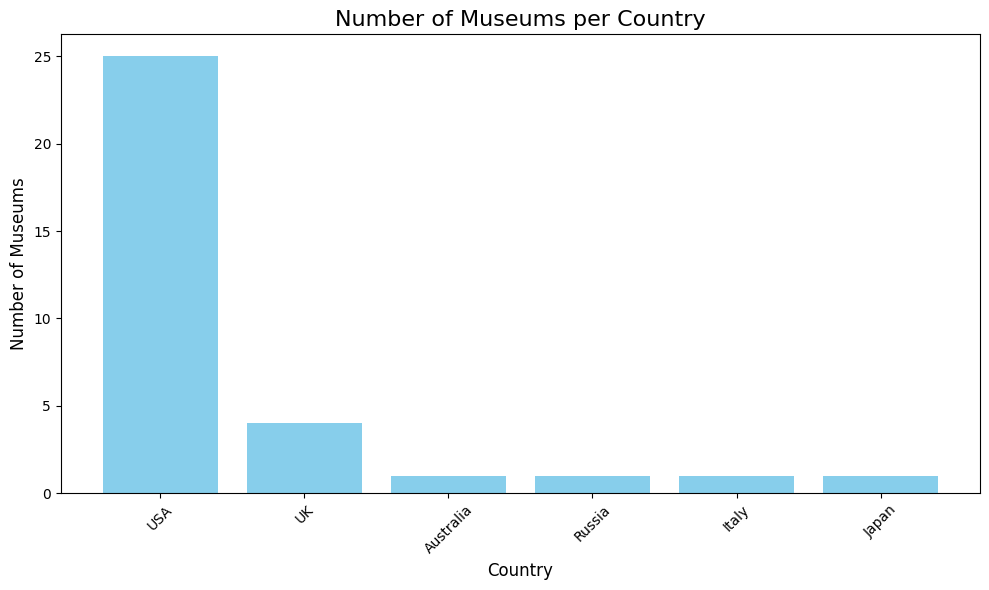

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'museum_id': range(1, 34),
    'name': [
        'The Museum of Modern Art', 'National Gallery of Victoria', 'The State Hermitage Museum', 
        'The Metropolitan Museum of Art', 'Nelson-Atkins Museum of Art', 'Museum of Fine Arts Boston', 
        'National Gallery of Art', 'National Gallery', 'The Barnes Foundation', 'Cleveland Museum Of Art', 
        'Museum of Fine Arts, Houston', 'The J. Paul Getty Museum', 'The Phillips Collection', 
        'Toledo Museum of Art', 'Los Angeles County Museum of Art', 'Solomon R. Guggenheim Museum', 
        'The Tate Gallery', 'Indianapolis Museum of Art', 'Fine Arts Museums of San Francisco Legion of Honor', 
        'Smithsonian American Art Museum', 'Philadelphia Museum of Art', 'The Art Institute of Chicago', 
        'Saint Louis Art Museum', 'Uffizi Gallery Italy', 'Ohara Museum of Art', 'Walters Art Museum', 
        'National Museum', 'Columbus Museum of Art', 'Kimbell Art Museum', 'Dallas Museum of Art', 
        'Chrysler Museum of Art', 'Norton Simon Museum', 'Courtauld Gallery'
    ],
    'country': [
        'USA', 'Australia', 'Russia', 'USA', 'USA', 'USA', 'USA', 'UK', 'USA', 'USA', 'USA', 'USA', 'USA', 
        'USA', 'USA', 'USA', 'UK', 'USA', 'USA', 'USA', 'USA', 'USA', 'Italy', 'Japan', 'USA', 'UK', 'USA', 
        'USA', 'USA', 'USA', 'USA', 'USA', 'UK'
    ]
}

# Count number of museums per country
museums_per_country = df['country'].value_counts().reset_index()
museums_per_country.columns = ['Country', 'Museum Count']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(museums_per_country['Country'], museums_per_country['Museum Count'], color='skyblue')

# Add labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Museums', fontsize=12)
plt.title('Number of Museums per Country', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Establish a connection to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Aaryasharma27&',
    host='localhost',
    port=3306,
    database='famous_paintings1'  # Replace with your actual database name
)

# Create a cursor to execute SQL queries
cursor = connection.cursor()

# SQL query to fetch data (sale_price, regular_price)
query = """
SELECT sale_price, regular_price
FROM work;  # Ensure 'work' is the correct table name
"""

try:
    # Execute the query
    cursor.execute(query)

    # Check if the query returned any rows
    if cursor.rowcount == 0:
        print("No data returned from the query.")
    else:
        # Fetch all the data if available
        data = cursor.fetchall()

        # Extract sale_price and regular_price into separate lists
        sale_prices = [row[0] for row in data]
        regular_prices = [row[1] for row in data]

        # Create a DataFrame for easier plotting
        df = pd.DataFrame({
            'Sale Price': sale_prices,
            'Regular Price': regular_prices
        })

        # Create a scatter plot with a regression line
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Sale Price', y='Regular Price', data=df, scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red'})

        # Set labels and title
        plt.title('Sale Price vs Regular Price', fontsize=16)
        plt.xlabel('Sale Price', fontsize=12)
        plt.ylabel('Regular Price', fontsize=12)
        plt.grid(True)

        # Show the plot
        plt.show()

except mysql.connector.Error as err:
    print(f"Error: {err}")

Error: 1054 (42S22): Unknown column 'sale_price' in 'field list'
